# Introduction

Welcome to Domino Data Lab. This notebook is used for our Python onboarding processes. We will be doing a very simple example analysis of crimes in San Francisco. 

# Load libraries and configure
Let's begin by configuring out notebook and loading necessary libraries.

In [1]:
%matplotlib inline
from IPython.core.display import HTML
import folium
import pandas as pd
import sys
import matplotlib.pyplot as plt
 
SF_COORDINATES = (37.76, -122.45)


We will define 2 functions that will make our life easier later: 

- `get_filtered_data` filters the original dataset and returns data on a specific category of crime that occured on a specific day of the week.

- `inline_map` allows you to plot and view Folium/Leaflet maps in the current IPython notebook.

In [2]:
def get_filtered_data(day, crime):
    dayselect = [day]
    crimeselect = crime
    daycond = crimedata['DayOfWeek'].isin(dayselect) 
    crimecond = crimedata['Category'] == (crimeselect)

    filtered_crimedata = crimedata[crimecond & daycond]
    return filtered_crimedata

# Explore the data
Next, we will load in the data and explore some parameters.

In [3]:
crimedata = pd.read_csv('SFPD_Incidents_-_Current_Year__2015_.csv')
print 'Total number of crimes: ' +str(len(crimedata)) +'\n'
crime_cat = crimedata.Category.unique()
print 'All categories of crimes:\n %s \n'%crime_cat
crimedata.head()

Total number of crimes: 112331

All categories of crimes:
 ['NON-CRIMINAL' 'ASSAULT' 'OTHER OFFENSES' 'VANDALISM' 'DRUNKENNESS'
 'WARRANTS' 'MISSING PERSON' 'DRUG/NARCOTIC' 'ROBBERY' 'LARCENY/THEFT'
 'BURGLARY' 'SECONDARY CODES' 'RUNAWAY' 'VEHICLE THEFT'
 'SEX OFFENSES, FORCIBLE' 'SUSPICIOUS OCC' 'WEAPON LAWS' 'SUICIDE' 'FRAUD'
 'LIQUOR LAWS' 'TRESPASS' 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY'
 'BRIBERY' 'EXTORTION' 'ARSON' 'DRIVING UNDER THE INFLUENCE' 'PROSTITUTION'
 'DISORDERLY CONDUCT' 'EMBEZZLEMENT' 'KIDNAPPING' 'FAMILY OFFENSES'
 'BAD CHECKS' 'LOITERING' 'GAMBLING' 'SEX OFFENSES, NON FORCIBLE'
 'PORNOGRAPHY/OBSCENE MAT' 'TREA'] 



,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"


# Focus the data exploration on a specific crime and day of week

First, let's draw a simple plot in Matplotlib.

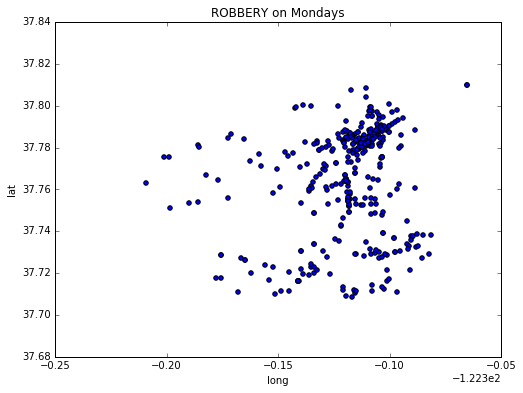

In [7]:
#Focus on specific crime and produce plot in Matplotlib
crime = 'ROBBERY'
day = 'Monday'
filtered_crimedata = get_filtered_data(day, crime)
df = filtered_crimedata[['Y','X']]

#Plot scatterplot and save
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(filtered_crimedata.X, filtered_crimedata.Y)
plt.title('%s on %ss'%(crime,day))
plt.xlabel('long')
plt.ylabel('lat')
plt.savefig('foo.png')

### Plot an interactive map using Folium/Leaflet

#### Simple map

In [5]:
#simple map

simple_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
for each in filtered_crimedata.iterrows():
    simple_map.circle_marker(location =[each[1]['Y'],each[1]['X']], radius=10, line_color='#151B54',
                      fill_color='#151B54', fill_opacity=1)
simple_map.save('simple_map.html')
simple_map

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:6: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


# Use k-means to find the clusters for where the crimes are occuring

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:28: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


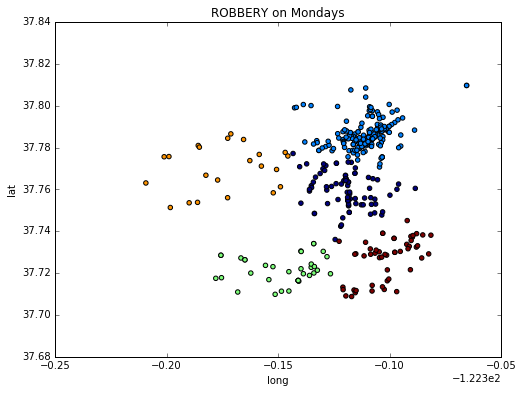

In [6]:
#Cluster map with k-means. Do they match up with neighborhoods?
import numpy as np
from sklearn.cluster import KMeans
k = 5
X = filtered_crimedata[['Y','X']]
model = KMeans(n_clusters=k, random_state=1).fit(X)
y_pred = model.predict(X)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df.X, df.Y, c=y_pred)
plt.title('%s on %ss'%(crime,day))
plt.xlabel('long')
plt.ylabel('lat')

def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    rgb = [(int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16)) for i in colors]
    return ['#%02x%02x%02x' % rgb_i for rgb_i in rgb]
colors= get_spaced_colors(k)

k_means_map = folium.Map(location=SF_COORDINATES, zoom_start=12)
for i,each in enumerate(filtered_crimedata.iterrows()):
    k_means_map.circle_marker(location =[each[1]['Y'],each[1]['X']], radius=10, line_color=colors[y_pred[i]],
                      fill_color=colors[y_pred[i]], fill_opacity=1)
k_means_map.save('kmeans_map.html')
k_means_map



# Run diagnostic statistics

We are saving a JSON files named `dominostats.json`. This is a special file. The statistics that are stored here are displayed in the Runs page so that you can view the key statistics on each run easily. For more information, see [the Domino Support page](http://support.dominodatalab.com/hc/en-us/articles/204348169-Run-Diagnostic-Statistics).

In [ ]:
#Run Diagnostic Statistics
import json
with open('dominostats.json', 'wb') as f:
    f.write(json.dumps({"model_score": '%.2f' %model.score(X), "n_crimes": len(X)}))